##In this challenge, you will be immersed in the critical aspects of Data Cleaning, Transformation, and Integration. You’ll gain hands-on experience in preparing a real-world dataset for insightful analysis.

##Create:
### A dataset that has been cleaned and transformed, ready for detailed analysis.

####Data Cleaning: Initial Assessment: Load the dataset and conduct a preliminary assessment to understand its structure and content Handling Inconsistencies: Identify and address missing values, incorrect data types, and data inconsistencies.

####Data Transformation - Categorical Transformation: Convert categorical data into a format suitable for analysis, such as one-hot encoding. Numerical Normalization: Normalize or standardize numerical features as required.

###Informative visualizations and summaries showcasing the data cleaning process.


####Data Exploration: Conduct exploratory data analysis on the cleaned and integrated dataset. Visualization: Create visualizations to reveal patterns and insights related to terrorism events in their socio-economic context.


###An integrated dataset that combines information from multiple sources for a comprehensive view.

###A detailed report documenting the steps and reasoning behind your data preprocessing.

In [3]:
#Task 1: Data Cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

df = pd.read_csv("terror.csv", encoding='latin1')

# Take a quick look
print(df.shape)
print(df.columns)
print(df.info())
print(df.head())

Saving terror.csv to terror.csv


/tmp/ipython-input-1194369625.py:9: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("terror.csv", encoding='latin1')


(181691, 135)
Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None
        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

         

In [7]:
summary = pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing Count": df.isnull().sum(),
    "Missing %": (df.isnull().mean() * 100).round(2),
    "Unique Values": df.nunique()
})

summary = summary.sort_values(by="Missing %", ascending=False)

summary.head(135)

,Data Type,Missing Count,Missing %,Unique Values
gsubname3,object,181671,99.99,14
weaptype4_txt,object,181618,99.96,5
weapsubtype4_txt,object,181621,99.96,16
weapsubtype4,float64,181621,99.96,16
weaptype4,float64,181618,99.96,5
...,...,...,...,...
dbsource,object,0,0.00,26
INT_LOG,int64,0,0.00,3
INT_IDEO,int64,0,0.00,3
INT_MISC,int64,0,0.00,3


#Initial Assesment: There are 5 rows with 135 columns. 77 of these columns have 60% + empty fields. We will remove these right away. But first making a copy to ensure no mistakes are made during data cleaning.

In [12]:
df_two = df.copy() #copy this dataset

In [23]:
df_two = df.dropna(thresh=len(df)*0.4, axis=1)
df_two.dtypes

cat_cols = df_two.select_dtypes(include="object").columns
print(cat_cols) #see what I'm working with

df_two[cat_cols].nunique().sort_values()

print(df_two[col].dropna().unique()[:5])


Index(['country_txt', 'region_txt', 'provstate', 'city', 'summary',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt',
       'weapdetail', 'scite1', 'scite2', 'dbsource'],
      dtype='object')

--- country_txt ---

--- region_txt ---

--- provstate ---

--- city ---

--- summary ---

--- attacktype1_txt ---

--- targtype1_txt ---

--- targsubtype1_txt ---

--- corp1 ---

--- target1 ---

--- natlty1_txt ---

--- gname ---

--- weaptype1_txt ---

--- weapsubtype1_txt ---

--- weapdetail ---

--- scite1 ---

--- scite2 ---

--- dbsource ---
['PGIS' 'Hewitt Project' 'Hijacking DB' 'CBRN Global Chronology' 'CAIN']


,0
attacktype1_txt,9
region_txt,12
weaptype1_txt,12
targtype1_txt,22
dbsource,26
weapsubtype1_txt,30
targsubtype1_txt,112
country_txt,205
natlty1_txt,215
provstate,2855


#We still have too much data. So we will drop summary, scite1, scite2, target1, corp1, weapdetail, etc.

#We will then take the remaining categorical columns and mark them with "Unknown" in a text format. We will then populate the blanks in the numerical columns with the median value.

In [25]:
df_two = df_two.drop(columns=[
    'weapdetail',
    'corp1',
    'scite1',
    'scite2',
    'summary',
    'target1'
]) #drop these columns #error showing because i already ran it. all good

KeyError: "['weapdetail', 'corp1', 'scite1', 'scite2', 'summary', 'target1'] not found in axis"

In [29]:
cat_cols = df_two.select_dtypes(include="object").columns #had to rerun since I deleted

df_two[cat_cols] = df_two[cat_cols].fillna("Unknown") #populate the "Unknown"

num_cols = df_two.select_dtypes(include="number").columns
print(num_cols) #get the numerical columns



Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'ishostkid', 'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')


In [30]:
df_two[num_cols] = df_two[num_cols].fillna(df_two[num_cols].median()) #populate blanks with the median value

In [37]:
def unique(col, n=15):
    return df_two[col].dropna().unique()[:n]

summary = pd.DataFrame({
    "Data Type": df_two.dtypes,
    "Missing Count": df_two.isnull().sum(),
    "Missing %": (df_two.isnull().mean() * 100).round(2),
    "Unique Values": df_two.nunique(),
    "Types of Values": [unique(col) for col in df_two.columns]})

summary = summary.sort_values(by="Missing %", ascending=False)

summary.head(135)

,Data Type,Missing Count,Missing %,Unique Values,Types of Values
eventid,int64,0,0.0,181691,"[197000000001, 197000000002, 197001000001, 197..."
iyear,int64,0,0.0,47,"[1970, 1971, 1972, 1973, 1974, 1975, 1976, 197..."
imonth,int64,0,0.0,13,"[7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]"
iday,int64,0,0.0,32,"[2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, ..."
extended,int64,0,0.0,2,"[0, 1]"
country,int64,0,0.0,205,"[58, 130, 160, 78, 101, 217, 218, 98, 499, 65,..."
country_txt,object,0,0.0,205,"[Dominican Republic, Mexico, Philippines, Gree..."
region,int64,0,0.0,12,"[2, 1, 5, 8, 4, 3, 9, 11, 10, 12, 6, 7]"
region_txt,object,0,0.0,12,"[Central America & Caribbean, North America, S..."
provstate,object,0,0.0,2855,"[Unknown, Federal, Tarlac, Attica, Fukouka, Il..."


#With this reduced list, I can still see duplicates. For example, country vs country_txt (I prefer the latter), natlty1 vs. natlty1_txt, weaptype1_txt vs. weaptype1, weapsubtype1_txt vs. weapsubtype1, targsubtype1 vs. targsubtype1_txt, targtype1 vs. targtype1_txt, attachtype1 vs. attacktype1_txt.

#We should convert the following to "category": iyear, imonth, iday, country_txt, region_txt, provstate, city, attacktype1_txt,targtype1_txt, targsubtype1_txt, natlty1_txt, gname, weaptype1_txt, weapsubtype1_txt, dbsource

#We should convert the following to numerical: guncertain1, nperps, crit1, crit2, crit3, extended, multiple, success, suicide


#These are binary: guncertain1, nperps, crit1, crit2, crit3, extended, multiple, success, suicide

In [38]:
df_two = df_two.drop(columns=[
    'country',
    'natlty1',
    'weaptype1',
    'weapsubtype1',
    'targsubtype1',
    'targtype1',
    'attacktype1'
]) #drop more columns now that we've seen duplicates


df_two = df_two.astype({
    "iyear": "category",
    "imonth": "category",
    "iday": "category",
    "country_txt": "category",
    "region_txt": "category",
    "provstate": "category",
    "city": "category",
    "attacktype1_txt": "category",
    "targtype1_txt": "category",
    "targsubtype1_txt": "category",
    "natlty1_txt": "category",
    "gname": "category",
    "weaptype1_txt": "category",
    "weapsubtype1_txt": "category",
    "dbsource": "category"
}) #label these as categorical

numeric_binary_fields = [
    "guncertain1","nperps","crit1","crit2","crit3",
    "extended","multiple","success","suicide"
] #reaffirming its binary

In [39]:
def unique(col, n=15):
    return df_two[col].dropna().unique()[:n]

summary = pd.DataFrame({
    "Data Type": df_two.dtypes,
    "Missing Count": df_two.isnull().sum(),
    "Missing %": (df_two.isnull().mean() * 100).round(2),
    "Unique Values": df_two.nunique(),
    "Types of Values": [unique(col) for col in df_two.columns]})

summary = summary.sort_values(by="Missing %", ascending=False)

summary.head(135)

,Data Type,Missing Count,Missing %,Unique Values,Types of Values
eventid,int64,0,0.0,181691,"[197000000001, 197000000002, 197001000001, 197..."
iyear,category,0,0.0,47,"[1970, 1971, 1972, 1973, 1974, ..., 1980, 1981..."
imonth,category,0,0.0,13,"[7, 0, 1, 2, 3, ..., 8, 9, 10, 11, 12] Length:..."
iday,category,0,0.0,32,"[2, 0, 1, 3, 6, ..., 13, 14, 15, 19, 20] Lengt..."
extended,int64,0,0.0,2,"[0, 1]"
country_txt,category,0,0.0,205,"['Dominican Republic', 'Mexico', 'Philippines'..."
region,int64,0,0.0,12,"[2, 1, 5, 8, 4, 3, 9, 11, 10, 12, 6, 7]"
region_txt,category,0,0.0,12,"['Central America & Caribbean', 'North America..."
provstate,category,0,0.0,2855,"['Unknown', 'Federal', 'Tarlac', 'Attica', 'Fu..."
city,category,0,0.0,36673,"['Santo Domingo', 'Mexico city', 'Unknown', 'A..."


In [40]:
df_two = df_two.replace(-99, np.nan) #i see several -99.0 and don't like that!

df_two = df_two.replace(-9, np.nan) #same

#Data Exploration: I'd like to know what countries had attacks, the size of the attack vs. the country (a bubble chart), also could be interesting to see the attack type, the number killed + wounded

#Data Visualization

/tmp/ipython-input-2829727686.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_two.groupby("country_txt")


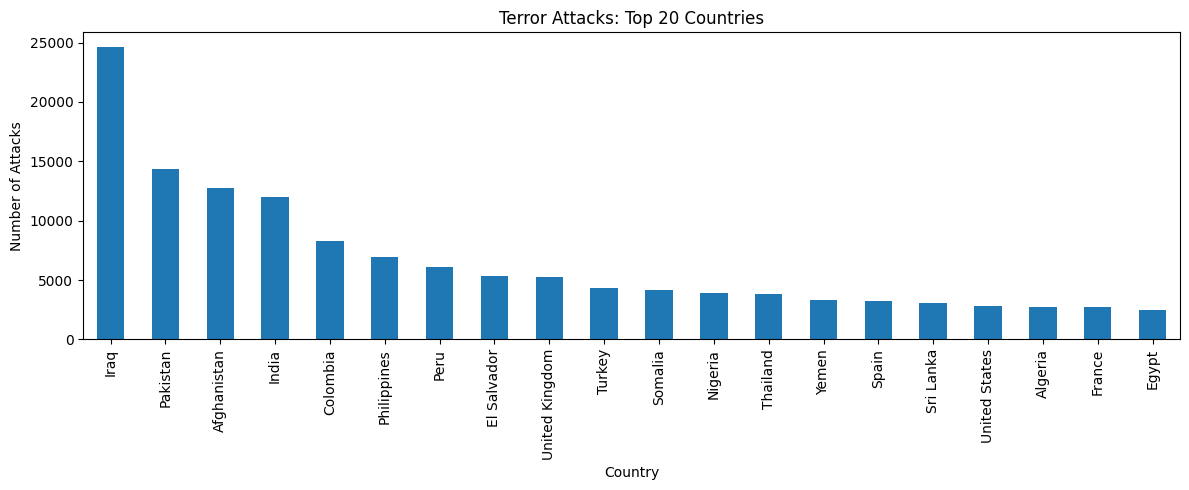

In [42]:
country_attacks = (
    df_two.groupby("country_txt")
          .size()
          .sort_values(ascending=False)
          .head(20)
)

country_attacks.plot(
    kind="bar",
    figsize=(12,5),
    title="Terror Attacks: Top 20 Countries"
)

plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.tight_layout()
plt.show()

In [50]:
import plotly.express as px

df_two["casualties"] = df_two[["nkill", "nwound"]].sum(axis=1) #create new category that aggregates

country_stats = (
    df_two.groupby(["country_txt", "region_txt"], as_index=False, observed=True)
          .agg(
              attacks=("eventid", "count"),
              casualties=("casualties", "sum")
          )
          .sort_values("attacks", ascending=False)
          .head(30)
)

#make visual
fig = px.scatter(
    country_stats,
    x="attacks",
    y="casualties",
    size="casualties",
    color="region_txt",
    hover_name="country_txt",
    title="Top 30 Countries by Terror Attacks and Casualties",
    size_max=60
)
fig.show()


In [59]:
#I'm intrigued: let's find what happened in the middle east

region = "Middle East & North Africa"
df_me = df_two[df_two.region_txt == region] #filter by country

#df_two["decade"] = (df_two["iyear"] // 10) * 10 ##oops i already marked as "category"

df_me["iyear_num"] = pd.to_numeric(df_me["iyear"], errors="coerce")

df_me["decade"] = (df_me["iyear_num"] // 10) * 10 #group by decade

df_me["casualties"] = df_me[["nkill", "nwound"]].sum(axis=1)

/tmp/ipython-input-2875485406.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2875485406.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2875485406.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
country_decade = (
    df_me.groupby(["country_txt", "decade"], as_index=False, observed=True)
         .agg(casualties=("casualties", "sum"))
)

top_countries = (
    country_decade.groupby("country_txt")["casualties"]
                  .sum()
                  .sort_values(ascending=False)
                  .head(10)
                  .index
)

country_decade_top = country_decade[country_decade["country_txt"].isin(top_countries)]




/tmp/ipython-input-2363064664.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [62]:
import plotly.express as px

fig = px.bar(
    country_decade_top,
    x="country_txt",
    y="casualties",
    color="decade",
    text="casualties",
    title="Casualties by Country by Decade (Top 10 Countries)",
)

fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Casualties",
    barmode="stack",
    xaxis={'categoryorder':'total descending'},
    height=600
)

fig.show()

In [73]:
#What's happening in Iraq
df_iq = df_two[df_two["country_txt"] == "Iraq"].copy()

df_iq["casualties"] = df_iq[["nkill", "nwound"]].fillna(0).sum(axis=1)


iq_attack_casualties = (
    df_iq.groupby("attacktype1_txt", observed=True)
         .agg(total_casualties=("casualties", "sum"))
         .reset_index()
         .sort_values("total_casualties", ascending=False)
)

# Plot
import plotly.express as px

fig = px.bar(
    iq_attack_casualties,
    x="attacktype1_txt",
    y="total_casualties",
    text="total_casualties",
    title="Total Casualties by Attack Type in Iraq",
)

fig.update_traces(texttemplate="%{text:.0f}", textposition="outside")
fig.update_layout(xaxis_title="Attack Type", yaxis_title="Total Casualties")
fig.show()
